# **<center>Dataton Septiembre 2020 - Immune Institute</center>** 

![Immune](https://i.imgur.com/0TSSaqL.png)  



¡Bienvenido al Datatón de Immune! Como ya habéis visto en el video, vuestro trabajo consiste en desarrollar un algoritmo con el que podamos averiguar las personas que padecerán del problema cardíaco causado el ataque químico. Para lograr este objetivo, usaréis un conjunto de datos de otros pacientes para poder analizar las variables necesarias y construir el modelo de machine learning que nos ayudará a detectar la enfermedad. 


**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy, Scikit-learn.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar Notebooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Clasificador*" para analizar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción.


¡Comencemos!

In [ ]:
import pandas as pd
import numpy as np
#import warnings
#warnings.simplefilter("ignore")
%pylab
%matplotlib inline

## Experimento 1 con el dataset con dimensionalidad reducida previamente mediante:  
### - VIF
### - VarianceThreshold  
### - SelectKBest

In [3]:
df = pd.read_csv('model_data.csv')
df.head()

,expmod,kurt,Li,count1,count2
0,135,0.23413,49.342,19.25,73.75
1,150,-0.64581,28.785,45.00,89.25
2,180,0.26447,32.381,28.50,78.25
3,135,0.65061,16.677,28.50,77.50
4,120,-0.14313,12.484,24.75,74.75


In [4]:
target = pd.read_csv('target.csv')
target.head()

,VF
0,0
1,0
2,0
3,0
4,0


In [5]:
#Unimos el df con el target para poder trabajar con un sólo df en PyCaret

df = df.join(target)

In [6]:
df.head()

,expmod,kurt,Li,count1,count2,VF
0,135,0.23413,49.342,19.25,73.75,0
1,150,-0.64581,28.785,45.00,89.25,0
2,180,0.26447,32.381,28.50,78.25,0
3,135,0.65061,16.677,28.50,77.50,0
4,120,-0.14313,12.484,24.75,74.75,0


In [7]:
df.VF.unique()

array([0, 1], dtype=int64)

In [8]:
df.dtypes

expmod      int64
kurt      float64
Li        float64
count1    float64
count2    float64
VF          int64
dtype: object

In [9]:
from pycaret.classification import *
exp1 = setup(df, target = 'VF')

Setup Succesfully Completed!


,Description,Value
0,session_id,5949
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(9146, 6)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9820,0.9972,0.9495,0.9453,0.9473,0.9365,0.9366,3.9611
1,Extra Trees Classifier,0.9819,0.9970,0.9495,0.9446,0.9469,0.9360,0.9361,0.2844
2,Gradient Boosting Classifier,0.9798,0.9969,0.9440,0.9382,0.9409,0.9288,0.9289,0.7035
3,Extreme Gradient Boosting,0.9795,0.9965,0.9467,0.9342,0.9403,0.9279,0.9281,0.3866
4,Light Gradient Boosting Machine,0.9795,0.9970,0.9431,0.9376,0.9401,0.9278,0.9279,0.1286
5,Random Forest Classifier,0.9794,0.9899,0.9220,0.9555,0.9383,0.9259,0.9262,0.1302
6,Ada Boost Classifier,0.9792,0.9955,0.9458,0.9335,0.9394,0.9269,0.9271,0.2328
7,Decision Tree Classifier,0.9728,0.9537,0.9247,0.9169,0.9202,0.9038,0.9043,0.0169
8,Logistic Regression,0.9714,0.9932,0.9265,0.9075,0.9167,0.8994,0.8997,0.0680
9,K Neighbors Classifier,0.9697,0.9840,0.9238,0.9007,0.9119,0.8936,0.8939,0.0120


#### Exp1: Modelo CatBoost Classifier

In [12]:
#Creamos el modelo para Catboost que es el que mejor rendimiento ha presentado
#Referencia: https://pycaret.org/create-model/
cb_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9875,0.9982,0.9633,0.9633,0.9633,0.9558,0.9558
1,0.9875,0.9978,0.9541,0.9720,0.9630,0.9555,0.9555
2,0.9781,0.9968,0.9444,0.9273,0.9358,0.9226,0.9227
3,0.9844,0.9973,0.9633,0.9459,0.9545,0.9451,0.9452
4,0.9750,0.9943,0.9174,0.9346,0.9259,0.9109,0.9109
5,0.9797,0.9966,0.9450,0.9364,0.9406,0.9284,0.9284
6,0.9828,0.9978,0.9450,0.9537,0.9493,0.9390,0.9390
7,0.9797,0.9969,0.9541,0.9286,0.9412,0.9289,0.9290
8,0.9797,0.9974,0.9541,0.9286,0.9412,0.9289,0.9290
9,0.9859,0.9989,0.9541,0.9630,0.9585,0.9501,0.9501


In [13]:
#Probamos si se pueden mejorar con la optimización de los hiperparámetros
tuned_cb_model = tune_model(cb_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9875,0.9982,0.9725,0.9550,0.9636,0.9561,0.9562
1,0.9875,0.9980,0.9633,0.9633,0.9633,0.9558,0.9558
2,0.9797,0.9970,0.9537,0.9279,0.9406,0.9284,0.9285
3,0.9828,0.9971,0.9541,0.9455,0.9498,0.9394,0.9394
4,0.9734,0.9946,0.8991,0.9423,0.9202,0.9043,0.9046
5,0.9812,0.9970,0.9541,0.9369,0.9455,0.9341,0.9342
6,0.9797,0.9973,0.9266,0.9528,0.9395,0.9273,0.9275
7,0.9812,0.9972,0.9541,0.9369,0.9455,0.9341,0.9342
8,0.9750,0.9974,0.9358,0.9189,0.9273,0.9122,0.9122
9,0.9875,0.9991,0.9541,0.9720,0.9630,0.9554,0.9555


No conseguimos mejorar el rendimiento con la optimización de hiperparámetros

In [20]:
#Vemos la predición con el test dataset para ver si hay sobreajuste
cb_model_pred = predict_model(cb_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9785,0.9969,0.9443,0.9304,0.9373,0.9243,0.9244


In [22]:
cb_model_pred.head()

,expmod,kurt,Li,count1,count2,VF,Label,Score
0,120.0,21.01500,33.3880,15.25,61.00,0,0,0.0000
1,225.0,-0.97986,28.0280,22.50,71.00,0,1,0.5130
2,180.0,21.81500,28.5430,14.00,49.25,0,0,0.0003
3,105.0,1.14300,8.8027,18.00,59.75,0,0,0.0003
4,45.0,15.86800,52.1630,22.50,80.50,0,0,0.0000


In [24]:
cb_model_pred.dtypes #Comprobamos que el tipo de algunas variables Pycaret los cambia  
#expmod originalmente estaba como int64 y VF lo cambia de int64 a object  
#Lo tendremos que tener en cuenta en la predicción con otros dataset externos

expmod    float64
kurt      float64
Li        float64
count1    float64
count2    float64
VF         object
Label      object
Score     float64
dtype: object

In [27]:
#Finalizamos el modelo para usarlo con nuevos datos
cb_final = finalize_model(cb_model);

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=<catboost.core.CatBoostClassifier object at 0x000001D49D1996D8>, ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:CatBoost Classifier Imported succesfully
INFO:logs:Checking ensemble method
INFO:logs:Initializing Fold 1
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 2
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 3
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 4
INFO:logs:Fitting Model

In [28]:
#Evaluamos con otros modelos según el Dataton Septiembre 2020 - Immune Institute
data_onu = pd.read_csv('data_onu.csv')
features = ['expmod', 'kurt', 'Li', 'count1', 'count2', 'VF']
data_onu = data_onu[features]
y_onu = data_onu['VF']

y_pred_onu = predict_model(cb_final, data = data_onu)
y_pred_onu = y_pred_onu['Label']
y_pred_onu = pd.to_numeric(y_pred_onu)

In [34]:
#Desarrollamos el modelo por Sklearn para ver la métrica BER
import sklearn.metrics as metrics

BER = 1 - metrics.balanced_accuracy_score(y_onu, y_pred_onu)
variables = len(features) - 1 #Eliminamos la variable objetivo VF
print(BER*100)
print(BER*0.8 + variables*0.2)
print(variables) 

1.4705882352941124
1.011764705882353
5


#### Exp1: Modelo Extra Trees Classifier

In [87]:
#Probamos con el segundo de los modelos que mejor rendimiento tienen y que resulta más 
et_model = create_model('et')# redondeamos a 2 decimales usando "round=2"

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9579,0.9511,0.8532,0.8942,0.8732,0.8480,0.8483
1,0.9719,0.9792,0.9083,0.9252,0.9167,0.8998,0.8998
2,0.9656,0.9795,0.9259,0.8772,0.9009,0.8801,0.8806
3,0.9547,0.9837,0.8624,0.8704,0.8664,0.8391,0.8391
4,0.9750,0.9955,0.9266,0.9266,0.9266,0.9115,0.9115
5,0.9719,0.9862,0.9083,0.9252,0.9167,0.8998,0.8998
6,0.9547,0.9365,0.8440,0.8846,0.8638,0.8367,0.8370
7,0.9531,0.9700,0.8440,0.8762,0.8598,0.8317,0.8319
8,0.9688,0.9895,0.9358,0.8870,0.9107,0.8918,0.8923
9,0.9703,0.9904,0.9358,0.8947,0.9148,0.8968,0.8972


INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 9
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3679, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [38]:
#Intentamos mejorar la elección de hiperparámetros para optimizar el rendimeinto
#tuned_et_model = tune_model(et_model)

En este caso la optimización de hiperparametros, obtiene peores resultados.

Por tanto nos quedamos con et_model

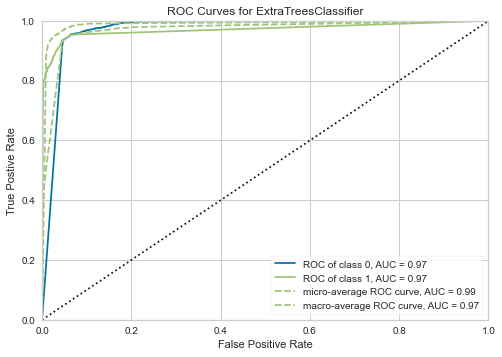

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [88]:
#Rendimiento del Modelo Extra Trees Classifier
plot_model(et_model)

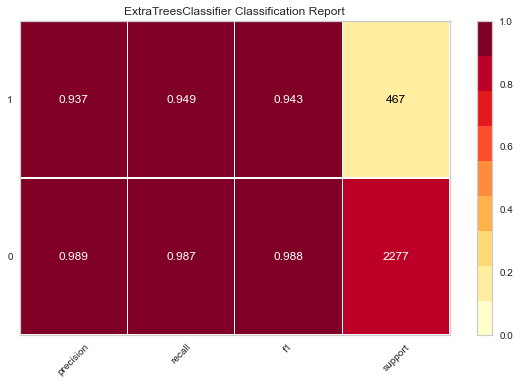

In [25]:
plot_model(et_model, plot='class_report')

In [89]:
evaluate_model(et_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [41]:
et_model_pred = predict_model(et_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9785,0.9971,0.9379,0.9359,0.9369,0.9239,0.9239


In [43]:
et_model_pred.dtypes

expmod    float64
kurt      float64
Li        float64
count1    float64
count2    float64
VF         object
Label      object
Score     float64
dtype: object

In [44]:
#Finalizamos el modelo para usarlo con nuevos datos
et_final = finalize_model(et_model);

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5949, verbose=0,
                     warm_start=False), ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:l

In [45]:
data_onu = pd.read_csv('data_onu.csv')
features = ['expmod', 'kurt', 'Li', 'count1', 'count2', 'VF']
data_onu = data_onu[features]
y_onu = data_onu['VF']

y_pred_onu = predict_model(et_final, data = data_onu)
y_pred_onu = y_pred_onu['Label']
y_pred_onu = pd.to_numeric(y_pred_onu)

In [46]:
#y_onu

In [49]:
#y_pred_onu

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: Label, Length: 200, dtype: int64

In [47]:
#Desarrollamos el modelo por Sklearn para ver la métrica BER
import sklearn.metrics as metrics

BER = 1 - metrics.balanced_accuracy_score(y_onu, y_pred_onu)
variables = len(features) - 1
print(BER*100)
print(BER*0.8 + variables*0.2)
print(variables)

1.4705882352941124
1.011764705882353
5


Este es el mejor resultado obtenido en la métrica BER con 5 variables.  
Quizás optimizando parámetros y disminuyendo el número de variables podriamos obtener mejores resultados

## Experimento 2:  Vamos a comprobar la eficiencia del modelo con el dataframe original y completo con las 30 variables  
Vamos a intentar bajar la dimensionalidad bastante hasta llegar a 2 o 3 variables

In [48]:
data = pd.read_csv('data_reto.csv')

In [49]:
data.head()

,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,360.08,42.933,60,135,0.109620,0.15281,1.75,812,0.23413,0.65476,...,0.52618,0.003299,0.258,0.48395,2.1362,49.342,19.25,73.75,8.0208,0
1,333.41,54.733,120,150,0.149490,0.19259,2.25,740,-0.64581,0.45448,...,0.61896,0.002891,0.220,0.32814,1.5259,28.785,45.00,89.25,25.8700,0
2,359.18,46.600,90,180,0.169420,0.23900,3.00,606,0.26447,0.61511,...,0.56023,0.005732,0.302,0.34270,1.8921,32.381,28.50,78.25,13.4750,0
3,416.67,41.867,0,135,0.119590,0.15029,1.75,816,0.65061,0.65536,...,0.50644,0.003234,0.288,0.47740,1.8311,16.677,28.50,77.50,13.6130,0
4,544.08,49.333,120,120,0.099658,0.16490,2.00,792,-0.14313,0.61120,...,0.28983,0.003547,0.266,0.48095,2.0142,12.484,24.75,74.75,10.5270,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TCI     9146 non-null   float64
 1   TCSC    9146 non-null   float64
 2   exp     9146 non-null   int64  
 3   expmod  9146 non-null   int64  
 4   cm      9146 non-null   float64
 5   cvbin   9146 non-null   float64
 6   frqbin  9146 non-null   float64
 7   abin    9146 non-null   int64  
 8   kurt    9146 non-null   float64
 9   vfleak  9146 non-null   float64
 10  M       9146 non-null   float64
 11  A1      9146 non-null   float64
 12  A2      9146 non-null   float64
 13  A3      9146 non-null   float64
 14  mav     9146 non-null   float64
 15  psr     9146 non-null   float64
 16  hilb    9146 non-null   float64
 17  SamEn   9146 non-null   float64
 18  x3      9146 non-null   float64
 19  x4      9146 non-null   int64  
 20  x5      9146 non-null   float64
 21  x1      9146 non-null   float64
 22  

In [55]:
from pycaret.classification import *
exp2 = setup(data, target = 'VF', feature_selection = True, feature_selection_threshold=0.4,
             remove_multicollinearity=True, multicollinearity_threshold=0.6)
#Nos quedamos con un 40% de las mejores variables
#Y eliminamos la multicolinealidad entre variables independientes
#Acabamos quedándonos con 2 únicas variables

Setup Succesfully Completed!


,Description,Value
0,session_id,3679
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(9146, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container 0
INFO:logs:master_model_container 0
INFO:logs:display_container 0
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='VF',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels_...
                ('feature_select',
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    random_state=3679,
                           

In [56]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.9749,0.9708,0.9054,0.9446,0.9243,0.9093,0.9097,0.0105
1,Logistic Regression,0.9744,0.9893,0.9128,0.9357,0.9237,0.9083,0.9087,0.0384
2,CatBoost Classifier,0.9739,0.9902,0.9036,0.9409,0.9215,0.9059,0.9064,4.0000
3,Ada Boost Classifier,0.9725,0.9870,0.8916,0.9438,0.9166,0.9002,0.9009,0.1746
4,SVM - Linear Kernel,0.9724,0.0000,0.8861,0.9495,0.9158,0.8993,0.9007,0.0134
5,Gradient Boosting Classifier,0.9724,0.9888,0.9073,0.9289,0.9175,0.9009,0.9013,0.3459
6,Light Gradient Boosting Machine,0.9724,0.9894,0.9027,0.9327,0.9173,0.9007,0.9010,0.1395
7,Extreme Gradient Boosting,0.9720,0.9883,0.9008,0.9331,0.9162,0.8994,0.9000,0.2946
8,Ridge Classifier,0.9708,0.0000,0.9275,0.9043,0.9153,0.8976,0.8981,0.0084
9,Random Forest Classifier,0.9703,0.9683,0.8953,0.9278,0.9111,0.8933,0.8936,0.1253


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

Conseguimos una ligera disminución del rendimiento pero hemos bajado hasta las 2 variables selecionadas en el dataset de entrenamiento y validación.

In [57]:
#Creamos el modelo de KNN que mejor rendimiento general ha dado
#Referencioa de modelos: https://pycaret.org/create-model/
knn_model = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9657,0.9559,0.8532,0.9394,0.8942,0.8738,0.8752
1,0.9782,0.9611,0.9083,0.9612,0.9340,0.9209,0.9214
2,0.9766,0.9807,0.9074,0.9515,0.9289,0.9149,0.9153
3,0.9672,0.9693,0.9083,0.9000,0.9041,0.8843,0.8843
4,0.9875,0.9801,0.9450,0.9810,0.9626,0.9551,0.9554
5,0.9812,0.9827,0.9266,0.9619,0.9439,0.9327,0.9329
6,0.9609,0.9336,0.8440,0.9200,0.8804,0.8571,0.8582
7,0.9734,0.9764,0.8899,0.9510,0.9194,0.9035,0.9043
8,0.9797,0.9825,0.9358,0.9444,0.9401,0.9279,0.9279
9,0.9781,0.9852,0.9358,0.9358,0.9358,0.9226,0.9226


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [59]:
#Intentamos mejorar la elección de hiperparámetros para optimizar el rendimiento
tuned_knn_model = tune_model(knn_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9719,0.9826,0.8532,0.9789,0.9118,0.8952,0.8982
1,0.9782,0.9825,0.9083,0.9612,0.9340,0.9209,0.9214
2,0.9797,0.9898,0.9259,0.9524,0.9390,0.9268,0.9269
3,0.9734,0.9939,0.9266,0.9182,0.9224,0.9064,0.9064
4,0.9828,0.9916,0.9358,0.9623,0.9488,0.9385,0.9386
5,0.9797,0.9951,0.9266,0.9528,0.9395,0.9273,0.9275
6,0.9547,0.9644,0.8349,0.8922,0.8626,0.8355,0.8361
7,0.9719,0.9790,0.8624,0.9691,0.9126,0.8959,0.8981
8,0.9812,0.9960,0.9541,0.9369,0.9455,0.9341,0.9342
9,0.9781,0.9953,0.9266,0.9439,0.9352,0.9220,0.9221


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=44, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


Ha mejorado levemente el rendimiento asique seguimos lo usamos (tuned_knn_model)

In [61]:
#Predecimos el modelo con el testset y comprobamos si hay sobreajuste
knn_model_pred = predict_model(tuned_knn_model)
#Parece que existe un ligero sobreajuste

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9698,0.9881,0.8587,0.9593,0.9062,0.8882,0.8902


In [62]:
knn_model_pred.head()

,Li,x4,VF,Label,Score
0,26.4080,4.0,0,0,0.0000
1,37.6190,3.0,0,0,0.0000
2,10.2540,5.0,0,0,0.0000
3,7.5483,5.0,0,0,0.0000
4,26.1380,12.0,1,0,0.1364


In [63]:
knn_model_pred.dtypes

Li       float64
x4       float64
VF        object
Label     object
Score    float64
dtype: object

In [64]:
#Finalizamos el modelo para usarlo con nuevos datos
knn_final = finalize_model(tuned_knn_model);

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=44, p=2,
                     weights='uniform'), ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:K Neighbors Classifier Imported succesfully
INFO:logs:Checking ensemble method
INFO:logs:Initializing Fold 1
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 2
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 3
INFO:logs

In [78]:
data_onu = pd.read_csv('data_onu.csv')
features = ['Li', 'x4', 'VF']
data_onu = data_onu[features]
y_onu = data_onu['VF']

y_pred_onu = predict_model(knn_final, data = data_onu)
y_pred_onu = y_pred_onu['Label']
y_pred_onu = pd.to_numeric(y_pred_onu)

SystemExit: (Type Error): test data does not have column TCI which was used for training

NO funciona haciendo la predicción del modelo final con PyCater, por lo que intentamos generarlo de la manera tradicional

In [80]:
from sklearn.model_selection import train_test_split

#data_model = data[['Li', 'x4']]
#target = data['VF']

x_train, x_test, y_train, y_test = train_test_split(data[['Li', 'x4']], data['VF'], random_state = 100, test_size= 0.30)

In [81]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print("La matriz de confusión es ")
    print(confusion_matrix)

    print('Precisión:', accuracy_score(y_true, y_pred))
    print('Exactitud:', precision_score(y_true, y_pred))
    print('Exhaustividad:', recall_score(y_true, y_pred))
    print('F1:', f1_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print('AUC:', auc(false_positive_rate, recall))

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

La matriz de confusión es 
[[5258   55]
 [ 108  981]]
Precisión: 0.9745392064979694
Exactitud: 0.946911196911197
Exhaustividad: 0.9008264462809917
F1: 0.9232941176470588
AUC: 0.9452372397036428


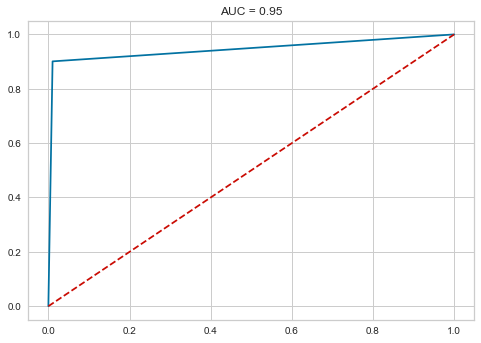

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=44, p=2,
                     weights='uniform').fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

metricas_modelos(y_train, y_pred_train);

La matriz de confusión es 
[[2248   29]
 [  48  419]]
Precisión: 0.9719387755102041
Exactitud: 0.9352678571428571
Exhaustividad: 0.8972162740899358
F1: 0.9158469945355191
AUC: 0.9422401089378094


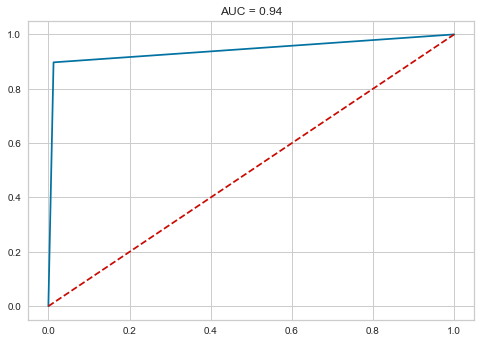

In [85]:
metricas_modelos(y_test, y_pred_test);

In [86]:
import sklearn.metrics as metrics
data_onu = pd.read_csv('data_onu.csv')

# list of features
features = x_train.columns 

X_onu = data_onu.drop('VF',axis=1)
y_onu = data_onu['VF']

#y_pred_onu = model.predict(X_onu[features])#Con el Árbol de decisión peor BER (model=5.68) que con Regresión logística
#y_pred_onu = rf_classifier.predict(X_onu[features])# El segundo mejor resultado con Random Forest (BER=4.5)
y_pred_onu = knn.predict(X_onu[features])# El mejor resultado con Extra Trees Classifier (BER=1.76)

BER = 1 - metrics.balanced_accuracy_score(y_onu, y_pred_onu)
variables = len(features)
print(BER*100)
print(BER*0.8 + variables*0.2)
print(variables)

5.588235294117649
0.44470588235294123
2
